# Importing Libraries 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading dataset (excel file)

In [2]:
dataset=pd.read_excel('Superstore_USA.xlsx')

In [5]:
# getting only 10 rows data using head() function
dataset.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67,88524
6,25549,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,Technology,...,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.4453,12,1451.37,88526
7,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.3665,12,6362.85,90193
8,19483,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,Office Supplies,...,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.2600,18,113.25,90197
9,24782,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,Office Supplies,...,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.4673,16,1515.17,90194


In [6]:
# Shape of data ( Means How many rows and columns are available  in dataset)
dataset.shape

(9426, 24)

Finding Missing Values

In [7]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

Null Values present in Product Base Margin column.So we will fill these null values with mean becuase in this column,the data is numeric.

In [8]:
# Filling Null Values
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [9]:
# Check one more time ,the null fill out or not
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Analysis of Order Priority Column

We will get the Priority Count of Each order from Order Priority column.


In [10]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [11]:
# return an array (or list) of unique elements in a Series (a column in a DataFrame)
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [12]:
# There are two Critical Priority in Order Priority.So we will replace one critical priority from another.
dataset['Order Priority']=dataset['Order Priority'].replace("Critical ","Critical")

In [13]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

 Creating graphs (count plot) to check count of every order Priority like (high,low ,medium and more)


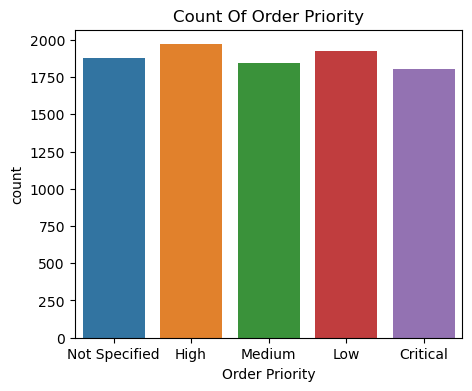

In [14]:
plt.figure(figsize=(5,4)) # Here we can fix the chart size ( Where  5 is width and 4 is height)
sns.countplot(x="Order Priority" , data=dataset)
plt.title("Count Of Order Priority")
plt.savefig("Count Of Order Priority.jpg") # save this graph for presentation
plt.show()

Insight
-- The Maximum Count Having High Order Priority .

# Analysis of Ship Mode Column

In [16]:
# Getting Count of Each shipping Mode
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

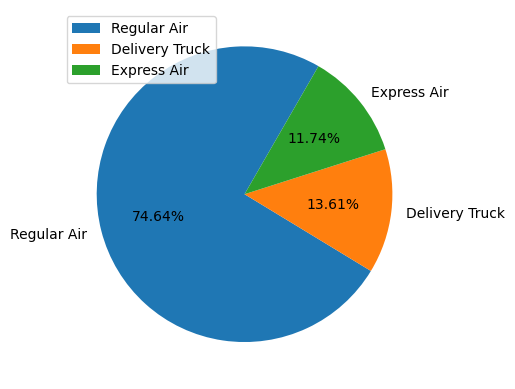

In [18]:
# Creatig Pie Chart For Graphics Visualization

# Getting x axis index -- like as : Regular Air,Delivery Truck,Express Air
x=dataset['Ship Mode'].value_counts().index

# Getting y axis values -- [7036, 1283, 1107]
y=dataset['Ship Mode'].value_counts().values

# pie Chart
plt.pie(y,labels=x,startangle=60,autopct='%0.2f%%') # startangle=60 used for rotating the chart. and autopct used for showing %.
plt.legend(loc =2)
plt.show()

Insight:- Regular Air is used most of the time for shipping.

# Analysis Between Ship Mode and Product category columns.                       Bivariate Analysis

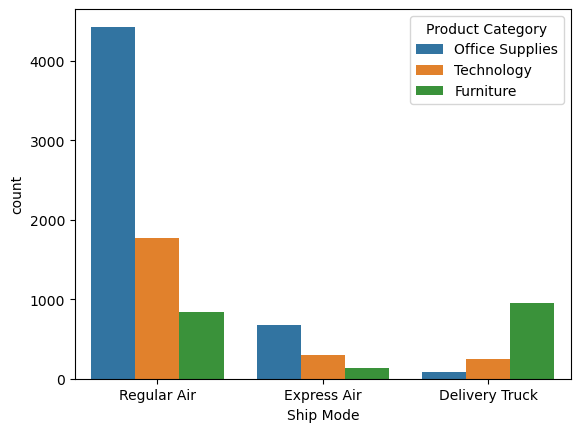

In [19]:
# Creating count plot of Ship Mode and Product category
ax=sns.countplot(x='Ship Mode', data=dataset,hue='Product Category')
plt.show()

Insight:-
          In Regular Air the most popular product category is office supplies and then Technology then Furniture.
          In Express Air  the most popular product category is Office supplies and then Technology then Furniture.
          In the Delivery Truck  the most popular product category is Furniture and then Technology then Office supplies.

# Customer Segment

In [20]:
# Customer Segment means (Which type of customer is coming. like :- corporate , Home Office , consumer , small Business)

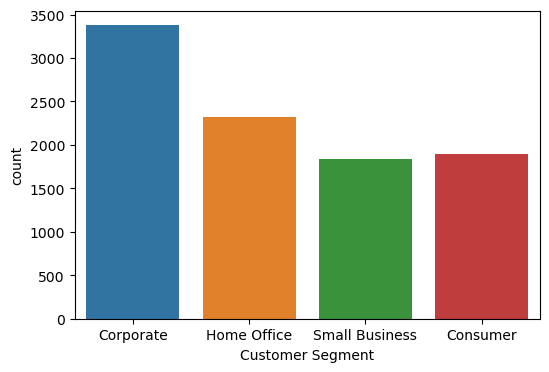

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment', data=dataset)
plt.show()

Insight :- The Most of the customer belong to Corporate segment,and then Home Office and Consumer and last belong to small Business segment.

# Product Category

We are Checking that which category is most selling.

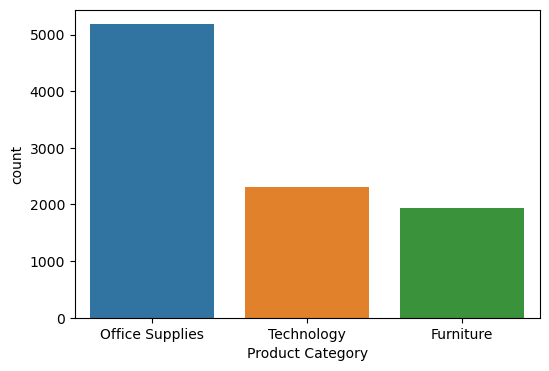

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category', data=dataset)
plt.show()

Insight:- The Most selling from Office Supplies, and then Technology then Furniture.

# Product Sub-Category

In [23]:
# Creating graph for sub-category

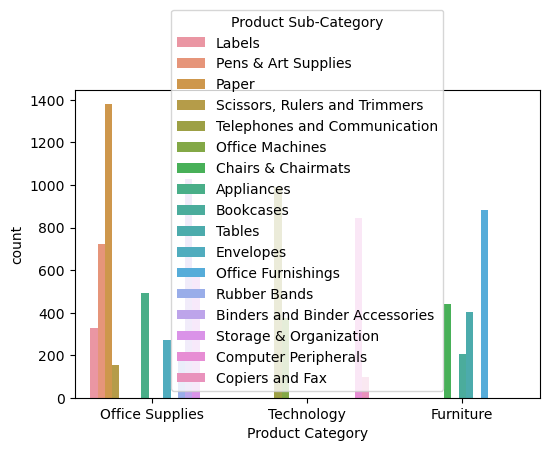

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category', data=dataset,hue='Product Sub-Category')
plt.show()

This Graph is not much understandable.So we will create graph individually for Each Product Category for sub-category .For Better understanding.

In [26]:
# Creating Graph for Office supplies in  product category .

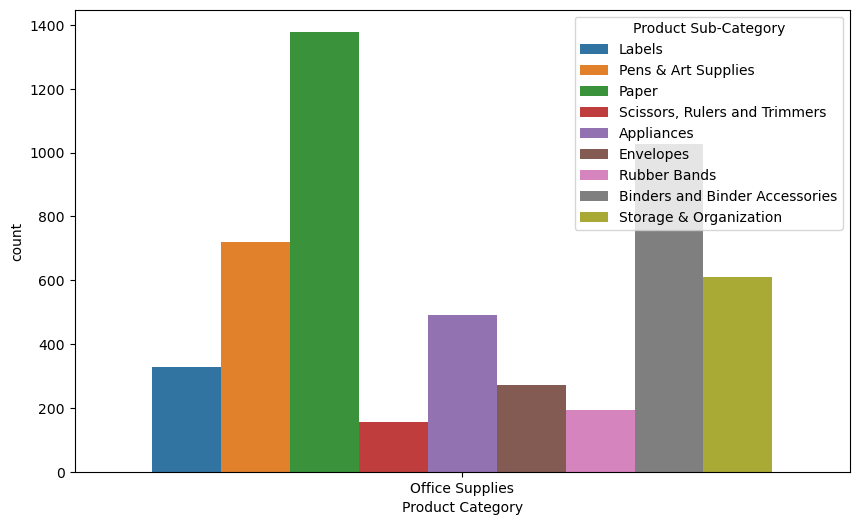

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Office Supplies"],hue='Product Sub-Category')
plt.show()

Insight:-In the Office Supplies product category, in sub-category the Paper has seen the highest sales and the least sales have been of Scissors, Rulers and Trimmer.


In [28]:
# Creating Graph for Technology in product category .

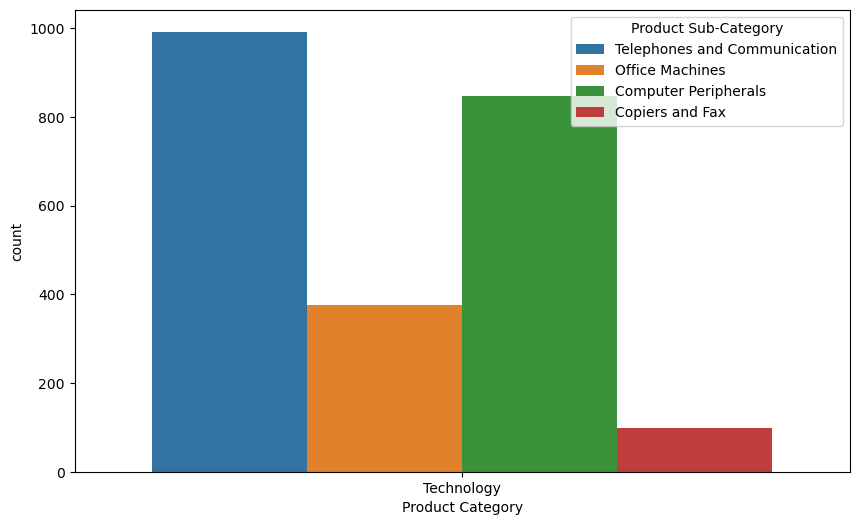

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Technology"],hue='Product Sub-Category')
plt.show()

Insight:-In the Technology  product category, in sub-category the Telephones and communication has seen the highest sales and the least sales have been of Copiers and Fax 

In [31]:
# Creating Graph for Furniture  in product category .

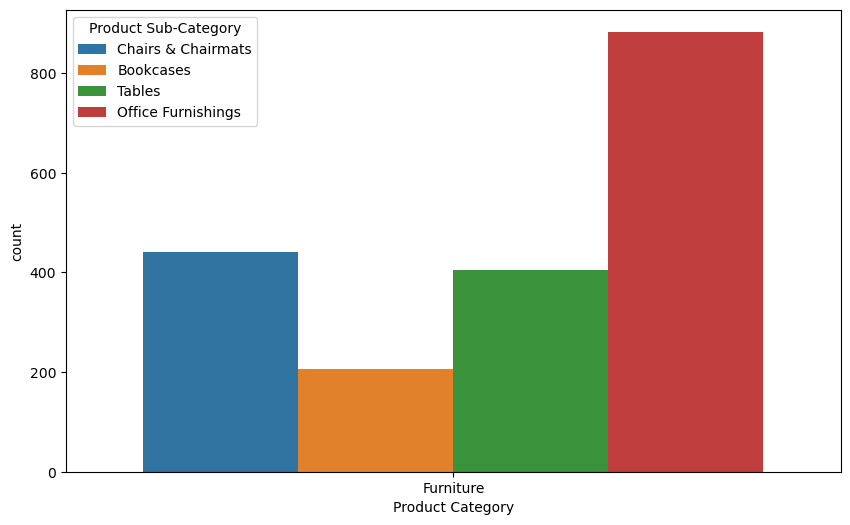

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Furniture"],hue='Product Sub-Category')
plt.show()

Insight:- In Sub-Category of Furniture the highest sales has seen of Office Furnishings and least is Bookcases

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# we will separate the year from the order date.And then checking - how many orders have been placed on which year.

In [36]:
dataset['Order Year']=dataset['Order Date'].dt.year

Now extract the information from order year column.which is that how many orders has been placed in which year

In [37]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

In [38]:
# Creating count plot of order year

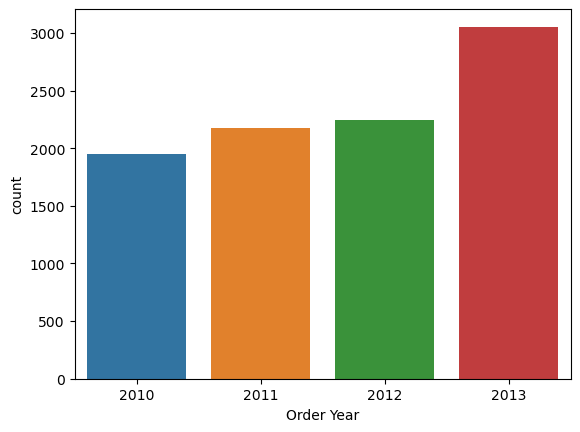

In [39]:
sns.countplot(x = 'Order Year', data=dataset)
plt.show()

Insight:- The sales increasing every year . which is good thing for any business.

# Now we are checking that,How much profit has been made in which category?

In [40]:
# Creating Bar plot

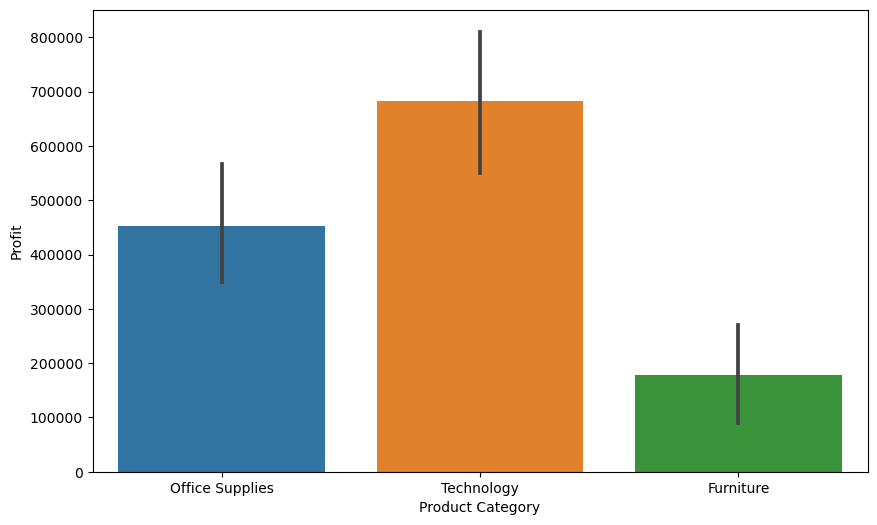

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator='sum')
plt.show()

Insight:- Highest profit is in Technology category.

# Now We Will see State wise Sales.

In [43]:
dataset['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [47]:
# Sales of Top five state
top_five_state=dataset['State or Province'].value_counts()[:5]
top_five_state

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

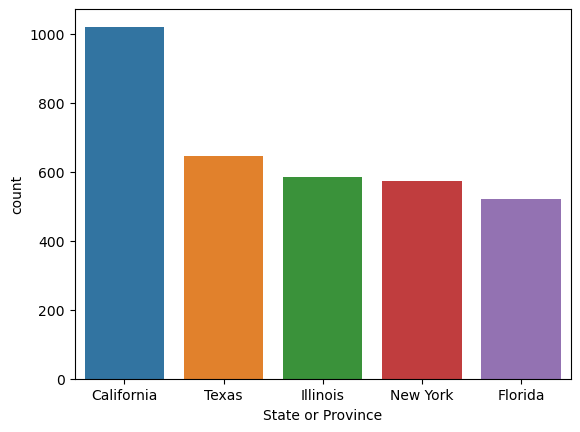

In [51]:
# Creating plot for top 5 state
sns.countplot(x='State or Province', data=dataset, order=top_five_state.index)
plt.show()

Insight:- The highest Sales in California.and least sales in Florida.So if you want to increase sales in florida and other states,you can launch offers for customer,and you should run other schemes for better sales. 

# We will Calculate product base margin from product category using bar plot.

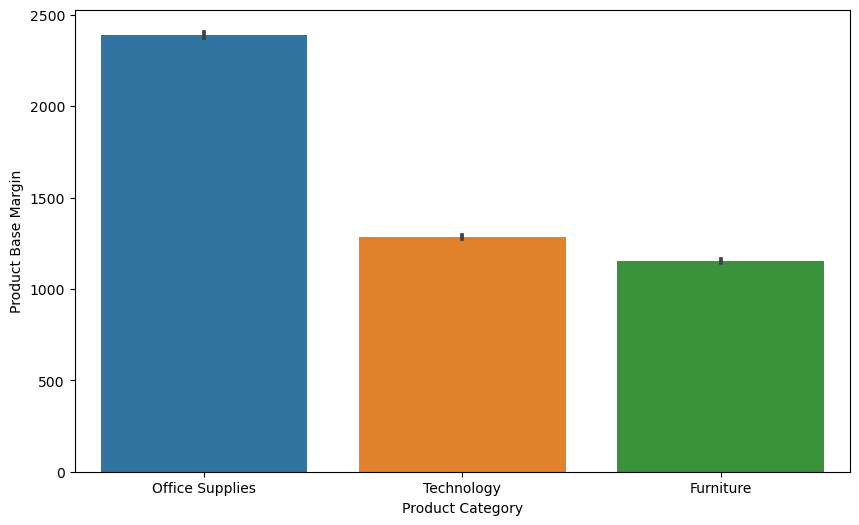

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Product Base Margin',data=dataset,estimator='sum')
plt.show()

Insight:-The Highest Margin in office supplies category .